In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
matchdf = pd.read_csv('IPL_Matches_2008_2022.csv')
balldf = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')


In [3]:
matchdf.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [4]:
matchdf.shape

(950, 20)

In [5]:
matchdf.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [6]:
matchdf[matchdf['WinningTeam'].isna()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [7]:
matchdf.drop(['City','ID','method'],axis=1,inplace=True)

In [8]:
matchdf.dropna()

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [9]:
balldf.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [10]:
balldf.shape

(225954, 17)

In [11]:
balldf.isna().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

### The missing values aren't going to affect our analysis. 

In [12]:
balldf.groupby(['batter']).count()

,ID,innings,overs,ballnumber,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
batter,,,,,,,,,,,,,,,,
A Ashish Reddy,196,196,196,196,196,196,5,196,196,196,196,196,15,15,10,196
A Badoni,139,139,139,139,139,139,10,139,139,139,139,139,9,9,8,139
A Chandila,7,7,7,7,7,7,0,7,7,7,7,7,1,1,1,7
A Chopra,75,75,75,75,75,75,5,75,75,75,75,75,5,5,4,75
A Choudhary,20,20,20,20,20,20,0,20,20,20,20,20,2,2,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1
Yashpal Singh,67,67,67,67,67,67,2,67,67,67,67,67,4,4,4,67
Younis Khan,7,7,7,7,7,7,0,7,7,7,7,7,1,1,0,7


In [13]:
balldf.groupby(['batter']).count().columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'bowler', 'non-striker',
       'extra_type', 'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam'],
      dtype='object')

## Creating batsmen Statistics

In [14]:
batgroup=balldf.groupby(['batter'])
batdf=pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'balls_faced'})

batdf['innings']=batgroup['innings'].nunique()
batdf['runs'] = batgroup['batsman_run'].sum()

batdf['0s'] = balldf[balldf['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batdf['0s'].fillna(0,inplace=True)

batdf['1s'] = balldf[balldf['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batdf['1s'].fillna(0,inplace=True)

batdf['2s'] = balldf[balldf['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batdf['2s'].fillna(0,inplace=True)

batdf['3s'] = balldf[balldf['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batdf['3s'].fillna(0,inplace=True)

batdf['4s'] = balldf[balldf['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batdf['4s'].fillna(0,inplace=True)

batdf['6s'] = balldf[balldf['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batdf['6s'].fillna(0,inplace=True)

batdf['player_out']=batgroup['player_out'].count()




In [15]:
batdf.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out
batter,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2


## Derived variable - Batsman average & strike rate

In [16]:
batdf['bat_average'] = round(batdf['runs']/batdf['player_out'],2)
batdf['bat_average'].fillna(0,inplace=True)
batdf['bat_strike'] = round(batdf['runs']/batdf['balls_faced']*100,2)
batdf['bat_strike'].fillna(0,inplace=True)

## Creating Bowler Statistics

In [17]:
balldf.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [18]:
balldf['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [19]:
bowlgroup = balldf.groupby(['bowler'])


bowldf = pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'balls_bowled'})


bwl_wkts = balldf[balldf['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowldf['wickets'] = bwl_wkts.groupby(['bowler'])['ballnumber'].count()
bowldf['wickets'].fillna(0,inplace=True)
 
# Calculating total number of overs bowled
bowldf['overs'] = round(bowldf['balls_bowled']/6)

bowldf['runs_conceded'] = balldf.groupby('bowler')['batsman_run'].sum()
bowldf['runs_conceded'] = bowldf['runs_conceded'].fillna(0)

bowldf['runs_conceded'] = bowldf['runs_conceded'].add(balldf[balldf['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)

bowldf.head()

,balls_bowled,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,396.0
A Badoni,12,2.0,2.0,11.0
A Chandila,234,11.0,39.0,242.0
A Choudhary,108,5.0,18.0,144.0
A Dananjaya,25,0.0,4.0,47.0


In [20]:
bowldf

,balls_bowled,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18.0,45.0,396.0
A Badoni,12,2.0,2.0,11.0
A Chandila,234,11.0,39.0,242.0
A Choudhary,108,5.0,18.0,144.0
A Dananjaya,25,0.0,4.0,47.0
...,...,...,...,...
YK Pathan,1184,42.0,197.0,1415.0
YS Chahal,2940,166.0,490.0,3624.0
Yash Dayal,205,11.0,34.0,296.0


## Bowling strike rate & Economy rate

In [21]:
bowldf['bowl_econ'] = round(bowldf['runs_conceded']/bowldf['overs'],2)
bowldf['bowl_strike_rate']=round(bowldf['balls_bowled']/bowldf['wickets'],2)


In [22]:
bowldf.tail()

,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
YK Pathan,1184,42.0,197.0,1415.0,7.18,28.19
YS Chahal,2940,166.0,490.0,3624.0,7.40,17.71
Yash Dayal,205,11.0,34.0,296.0,8.71,18.64
Yuvraj Singh,882,36.0,147.0,1077.0,7.33,24.50
Z Khan,2276,102.0,379.0,2782.0,7.34,22.31


<AxesSubplot:>

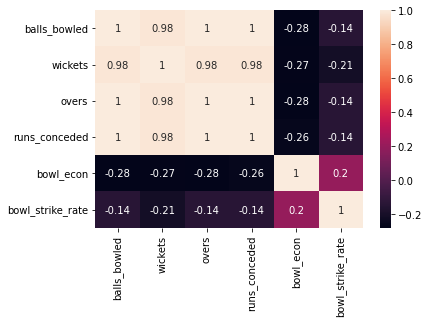

In [23]:
sns.heatmap(bowldf.corr(),annot=True)

## Getting the number of matches played by each player

In [24]:
def update_player_with_match(player_name, id):
    if player_name in all_players_dict:
        all_players_dict[player_name].add(id)
    else:
        all_players_dict[player_name] = {id}

# Consider players listed as batsman, non striker or bowler
def update_player_list(x):
    update_player_with_match(x['batter'],x['ID'])
    update_player_with_match(x['non-striker'],x['ID'])
    update_player_with_match(x['bowler'],x['ID']) 
        

In [25]:
all_players_dict = {}
out_temp = balldf.apply(lambda x: update_player_list(x),axis=1)
all_df = pd.DataFrame({'Players':list(all_players_dict.keys())})
all_df['matches'] = all_df['Players'].apply(lambda x: len(all_players_dict[x]))
all_df=all_df.set_index('Players')

In [26]:
players = pd.merge(all_df,batdf, left_index=True, right_index=True,how='outer')
players = pd.merge(players,bowldf, left_index=True, right_index=True,how='outer')
players.fillna(0,inplace=True)

In [27]:
players.tail()

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
Yash Dayal,9,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,205.0,11.0,34.0,296.0,8.71,18.64
Yashpal Singh,4,67.0,2.0,47.0,39.0,20.0,2.0,1.0,5.0,0.0,4.0,11.75,70.15,0.0,0.0,0.0,0.0,0.00,0.00
Younis Khan,1,7.0,1.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,3.00,42.86,0.0,0.0,0.0,0.0,0.00,0.00
Yuvraj Singh,129,2207.0,3.0,2754.0,977.0,741.0,119.0,3.0,218.0,149.0,109.0,25.27,124.78,882.0,36.0,147.0,1077.0,7.33,24.50
Z Khan,99,141.0,2.0,117.0,74.0,47.0,7.0,0.0,11.0,2.0,15.0,7.80,82.98,2276.0,102.0,379.0,2782.0,7.34,22.31


In [28]:
balldf.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [29]:
catches_cb = balldf[(balldf['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
catches_c = balldf[(balldf['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

catches_df = pd.merge(catches_cb,catches_c, left_index=True, right_index=True,how='outer')
catches_df.fillna(0,inplace=True)
catches_df['catches'] = catches_df['bowler_catches']+catches_df['fielder_catches']
catches_df.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

players = pd.merge(players,catches_df, left_index=True, right_index=True,how='outer')
players.fillna(0,inplace=True)

In [30]:
players.tail(2)

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches
Yuvraj Singh,129.0,2207.0,3.0,2754.0,977.0,741.0,119.0,3.0,218.0,149.0,109.0,25.27,124.78,882.0,36.0,147.0,1077.0,7.33,24.50,31.0
Z Khan,99.0,141.0,2.0,117.0,74.0,47.0,7.0,0.0,11.0,2.0,15.0,7.80,82.98,2276.0,102.0,379.0,2782.0,7.34,22.31,21.0


In [31]:
matchdf.head()

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


## Number of man of the match

In [32]:
matchdf.columns

Index(['Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue',
       'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam', 'WonBy',
       'Margin', 'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1',
       'Umpire2'],
      dtype='object')

In [33]:
matchdf['Player_of_Match'].value_counts()

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
                  ..
CR Brathwaite      1
Mohsin Khan        1
A Zampa            1
BCJ Cutting        1
MF Maharoof        1
Name: Player_of_Match, Length: 262, dtype: int64

In [34]:
players = pd.merge(players,matchdf['Player_of_Match'].value_counts(),left_index=True, right_index=True,how='left')
players['Player_of_Match']  = players[['Player_of_Match']].fillna(0)

In [35]:
players.head(3)


,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,...,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,...,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,...,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,...,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0


In [36]:
pd.set_option('display.max_columns',None)

In [37]:
players.head(2)

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.8,15.0,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.5,6.0,9.0,0.0


In [38]:
all_players=players.copy()
players_columns=players.columns

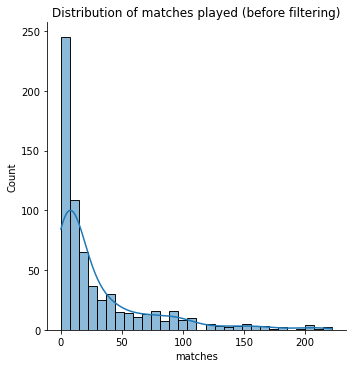

In [39]:
sns.displot(players['matches'],kde=True)
plt.title('Distribution of matches played (before filtering)')
plt.show()

In [40]:
players.shape

(656, 21)

In [41]:
CUTOFF_MATCHES = 10
players=players[players['matches']>=CUTOFF_MATCHES]

In [42]:
players.shape

(370, 21)

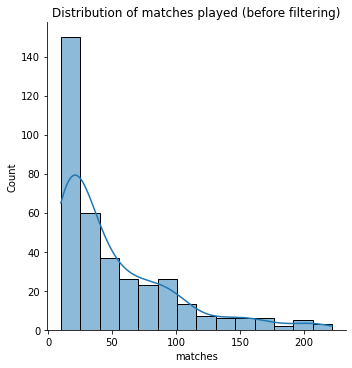

In [43]:
sns.displot(players['matches'],kde=True)
plt.title('Distribution of matches played (before filtering)')
plt.show()

<AxesSubplot:>

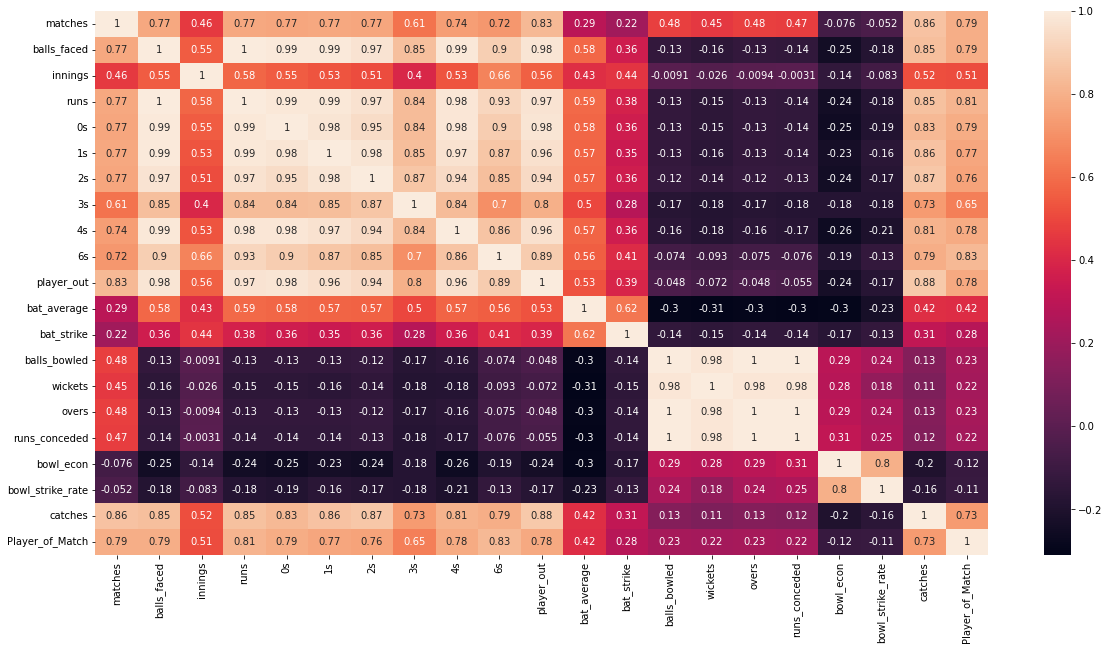

In [44]:

plt.figure(figsize=(20,10))
sns.heatmap(players.corr(),annot=True)



In [45]:
players.head(3)

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0


## Removing highly correlated columns

In [55]:
def correlation(data,threshold):
    col_corr=set() #set to avoid duplicate values
    corr_matrix=players.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [58]:
corr_features=correlation(players,0.8)
len(corr_features)

13

In [59]:
corr_features

{'0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'Player_of_Match',
 'catches',
 'overs',
 'player_out',
 'runs',
 'runs_conceded',
 'wickets'}

In [62]:
players_classified=players.drop(['0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'Player_of_Match',
 'overs',
 'player_out',
 'runs',
 'runs_conceded',
 'wickets'],axis=1)


In [63]:
players_classified.head(2)

,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches
A Ashish Reddy,28.0,196.0,2.0,18.67,142.86,270.0,8.8,15.0,9.0
A Badoni,11.0,139.0,2.0,17.89,115.83,12.0,5.5,6.0,9.0


In [64]:
players_classified.dtypes

matches             float64
balls_faced         float64
innings             float64
bat_average         float64
bat_strike          float64
balls_bowled        float64
bowl_econ           float64
bowl_strike_rate    float64
catches             float64
dtype: object

## Scaling the Data

In [65]:
players_new = players_classified[np.isfinite(players_classified).all(1)]
players_new

,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches
A Ashish Reddy,28.0,196.0,2.0,18.67,142.86,270.0,8.80,15.00,9.0
A Badoni,11.0,139.0,2.0,17.89,115.83,12.0,5.50,6.00,9.0
A Chandila,12.0,7.0,1.0,4.00,57.14,234.0,6.21,21.27,7.0
A Kumble,42.0,49.0,2.0,17.50,71.43,983.0,6.45,21.84,10.0
A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,19.98,21.0
...,...,...,...,...,...,...,...,...,...
YK Pathan,162.0,2334.0,3.0,29.03,138.05,1184.0,7.18,28.19,43.0
YS Chahal,130.0,89.0,2.0,6.17,41.57,2940.0,7.40,17.71,24.0
YV Takawale,10.0,183.0,2.0,24.00,104.92,0.0,0.00,0.00,13.0
Yuvraj Singh,129.0,2207.0,3.0,25.27,124.78,882.0,7.33,24.50,31.0


In [66]:
scaler=StandardScaler()

players_scaled=pd.DataFrame(scaler.fit_transform(players_new),columns=players_classified.columns)
players_scaled.head()

,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches
0,-0.502021,-0.406436,-0.162524,0.061094,1.139137,-0.438153,0.796860,-0.299156,-0.413577
1,-0.873220,-0.470388,-0.162524,-0.011383,0.263068,-0.770296,-0.152777,-0.970846,-0.413577
2,-0.851385,-0.618486,-2.090399,-1.302031,-1.639133,-0.484499,0.051539,0.168788,-0.506141
3,-0.196327,-0.571364,-0.162524,-0.047621,-1.175980,0.479746,0.120604,0.211328,-0.367295
4,2.249222,-0.166337,-0.162524,-0.552173,-0.629531,3.484480,0.333553,0.072513,0.141806


In [67]:
players_scaled=players_scaled.set_index(players_new.index)

## Fitting models

## K-Means clustering

## Finding the number of clusters using elbow plot

In [68]:
k_range=range(1,12)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(players_scaled)
    sse.append(km.inertia_)

In [69]:
sse

[3095.9999999999995,
 2253.0323861976563,
 1722.8653555579024,
 1423.78258129417,
 1165.444089749324,
 1071.6462735133866,
 976.0029198398556,
 910.9495781338376,
 835.8571330672842,
 795.167937908396,
 735.0981057256768]

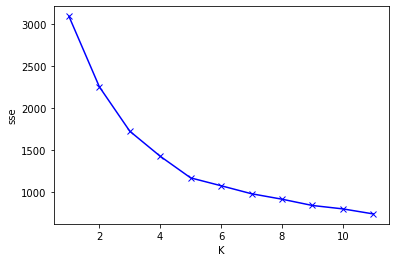

In [70]:
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse,'bx-')

## cluster=5

In [71]:
km = KMeans(n_clusters=5)
y_pred=km.fit_predict(players_scaled)

In [72]:
players_new['cluster']=y_pred

In [73]:
players_new

,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
A Ashish Reddy,28.0,196.0,2.0,18.67,142.86,270.0,8.80,15.00,9.0,4
A Badoni,11.0,139.0,2.0,17.89,115.83,12.0,5.50,6.00,9.0,1
A Chandila,12.0,7.0,1.0,4.00,57.14,234.0,6.21,21.27,7.0,0
A Kumble,42.0,49.0,2.0,17.50,71.43,983.0,6.45,21.84,10.0,0
A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,19.98,21.0,2
...,...,...,...,...,...,...,...,...,...,...
YK Pathan,162.0,2334.0,3.0,29.03,138.05,1184.0,7.18,28.19,43.0,3
YS Chahal,130.0,89.0,2.0,6.17,41.57,2940.0,7.40,17.71,24.0,2
YV Takawale,10.0,183.0,2.0,24.00,104.92,0.0,0.00,0.00,13.0,1
Yuvraj Singh,129.0,2207.0,3.0,25.27,124.78,882.0,7.33,24.50,31.0,3


In [91]:
top_players=players_new.loc[players_new['matches']>50]

In [92]:
top_players.head(2)

,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,19.98,21.0,2
A Nehra,88.0,63.0,2.0,5.12,65.08,1974.0,7.58,18.62,19.0,2


In [93]:
top_players.reset_index(inplace=True)
top_players = top_players.rename(columns = {'index':'names'})

In [95]:
top_players.head(2)

,names,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
0,A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,19.98,21.0,2
1,A Nehra,88.0,63.0,2.0,5.12,65.08,1974.0,7.58,18.62,19.0,2


In [96]:
top_players_cluster=pd.DataFrame(top_players[['names','cluster']])

In [100]:
teams1=top_players_cluster.loc[top_players_cluster['cluster']==0]
teams1=teams1['names'].tolist()

teams2=top_players_cluster.loc[top_players_cluster['cluster']==1]
teams2=teams2['names'].tolist()

teams3=top_players_cluster.loc[top_players_cluster['cluster']==2]
teams3=teams3['names'].tolist()

teams4=top_players_cluster.loc[top_players_cluster['cluster']==3]
teams4=teams4['names'].tolist()

teams5=top_players_cluster.loc[top_players_cluster['cluster']==4]
teams5=teams5['names'].tolist()

In [101]:
total_teams_df=pd.DataFrame(teams4,columns=['teams4'])

total_teams_df['teams1']=pd.Series(teams1)
total_teams_df['teams2']=pd.Series(teams2)
total_teams_df['teams3']=pd.Series(teams3)
total_teams_df['teams5']=pd.Series(teams5)
total_teams_df=total_teams_df.fillna('')

total_teams_df=total_teams_df[['teams1','teams2','teams3','teams4','teams5']]

total_teams_df

,teams1,teams2,teams3,teams4,teams5
0,AB Dinda,AC Gilchrist,A Mishra,AB de Villiers,AJ Finch
1,Imran Tahir,DPMD Jayawardene,A Nehra,AM Rahane,AM Nayar
2,L Balaji,EJG Morgan,AD Russell,AT Rayudu,BJ Hodge
3,M Muralitharan,Ishan Kishan,AR Patel,BB McCullum,DJ Hooda
4,M Prasidh Krishna,KC Sangakkara,B Kumar,CH Gayle,DJ Hussey
5,MM Patel,KK Nair,CH Morris,DA Miller,DL Chahar
6,Mohammed Siraj,KM Jadhav,DJ Bravo,G Gambhir,DR Smith
7,PP Ojha,MEK Hussey,DS Kulkarni,GJ Maxwell,JP Duminy
8,S Kaul,NV Ojha,DW Steyn,HH Pandya,JP Faulkner
9,S Nadeem,PP Shaw,HV Patel,JC Buttler,KV Sharma


In [102]:
teams1=top_players.loc[top_players['cluster']==0]
teams2=top_players.loc[top_players['cluster']==1]
teams3=top_players.loc[top_players['cluster']==2]
teams4=top_players.loc[top_players['cluster']==3]
teams5=top_players.loc[top_players['cluster']==4]
teams1.head(2)

,names,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
2,AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.82,23.03,7.0,0
33,Imran Tahir,59.0,37.0,2.0,8.25,89.19,1340.0,7.64,16.34,13.0,0


### Understanding the players in term of their economical bowling
#### i)Players with more number of balls delivered are experienced bowler
#### ii)Players with less number of balls delivered are usually batsmen 


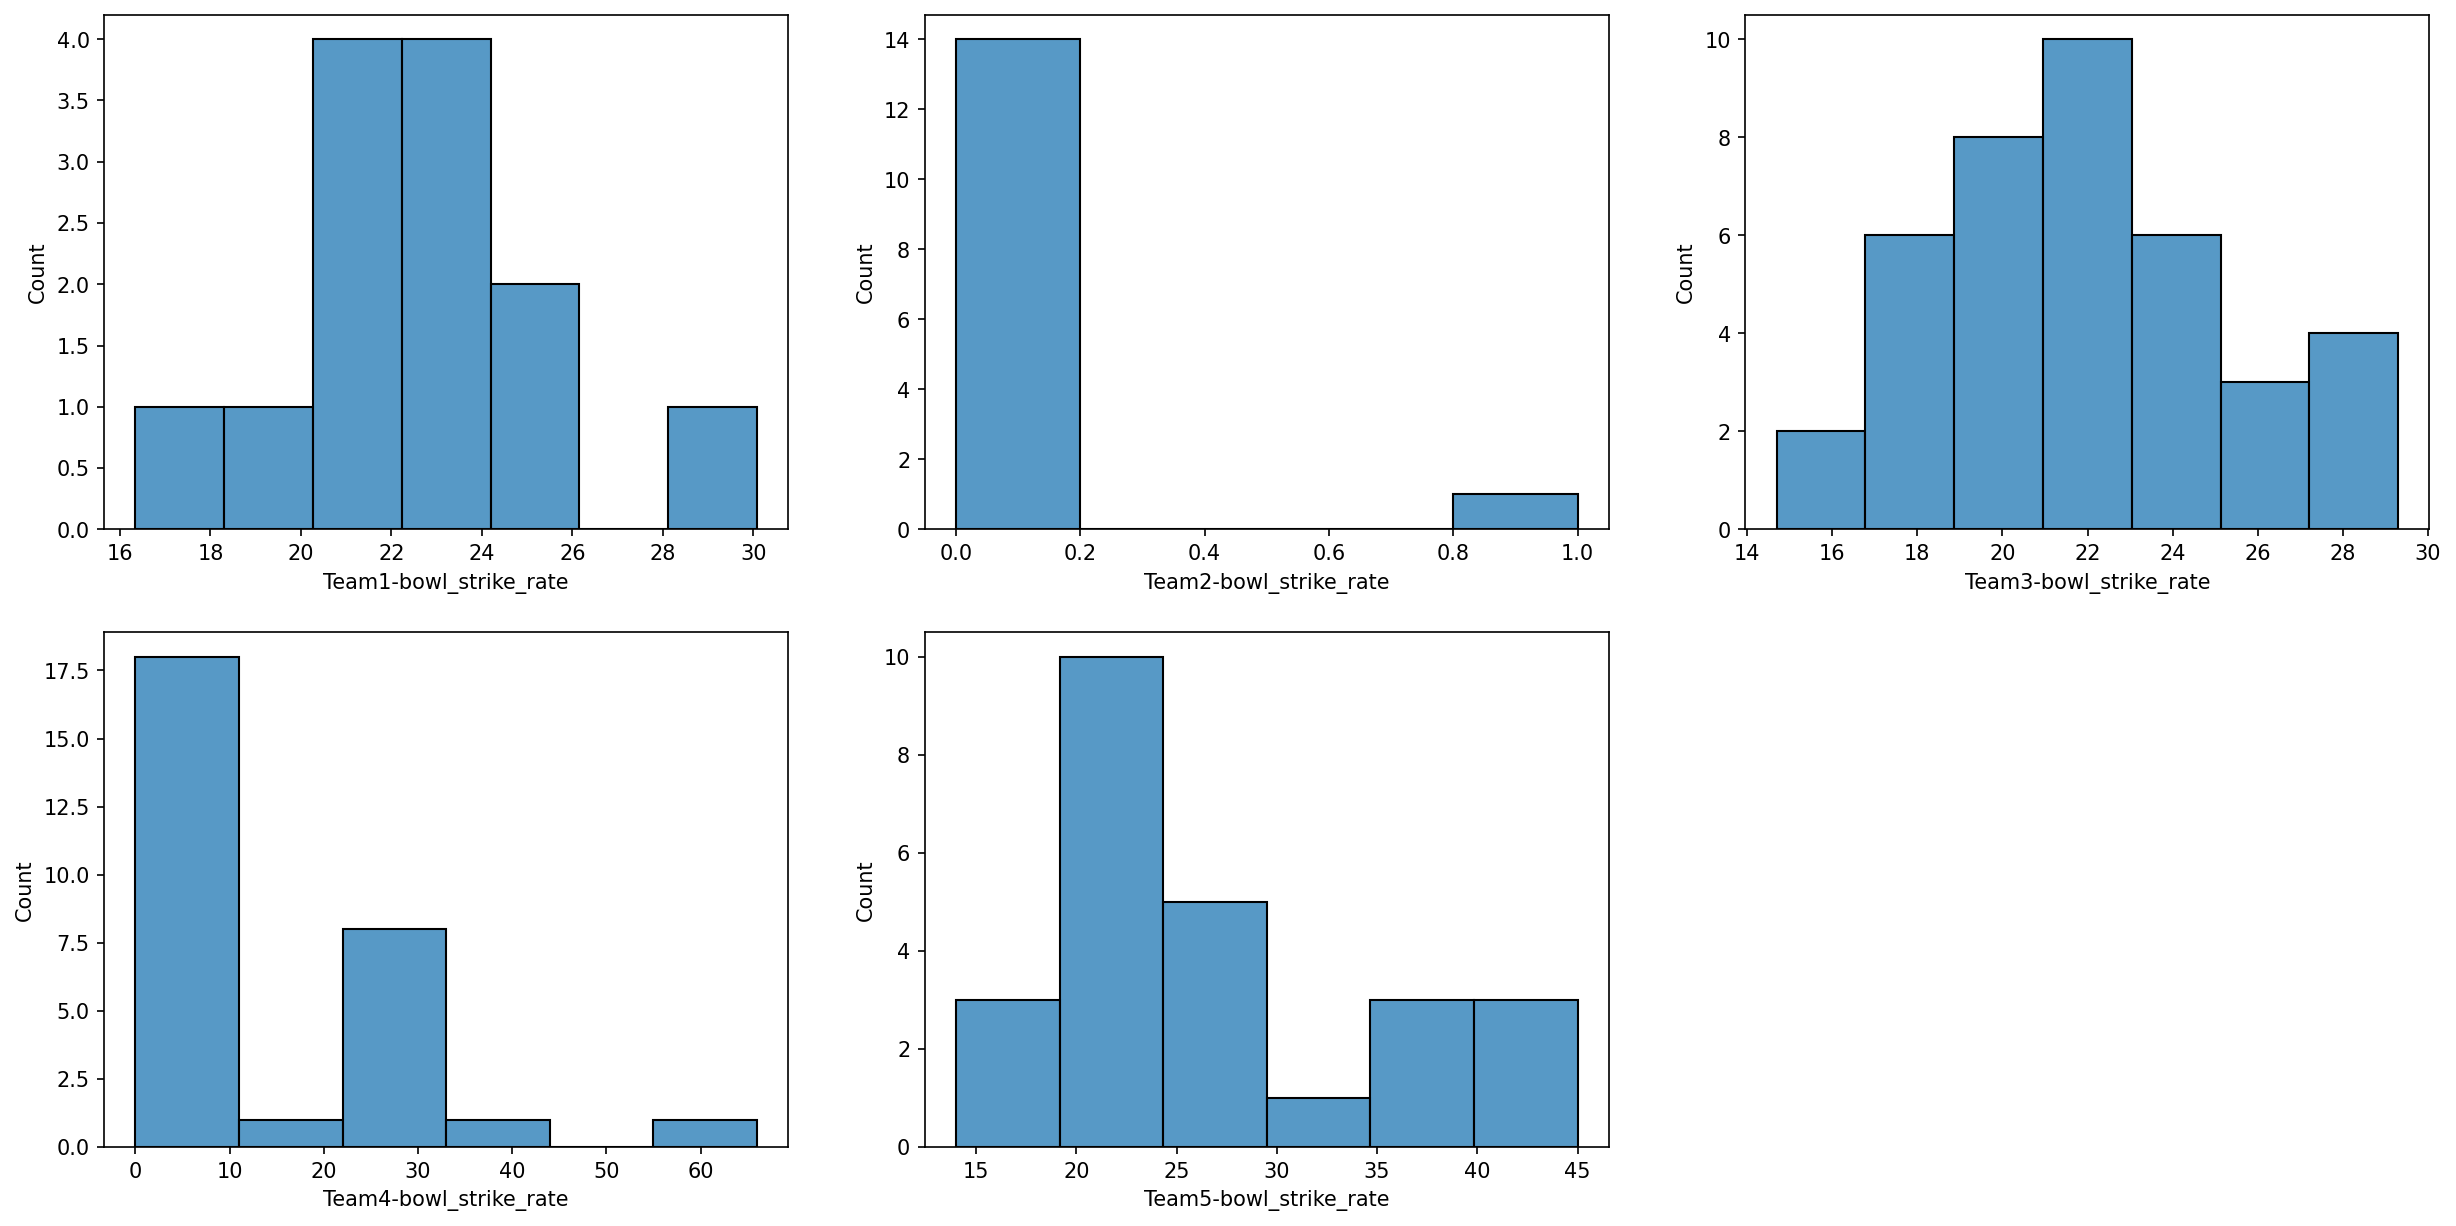

In [110]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,3,1)
sns.histplot(teams1['bowl_strike_rate'])
plt.xlabel('Team1-bowl_strike_rate')

plt.subplot(2,3,2)
sns.histplot(teams2['bowl_strike_rate'])
plt.xlabel('Team2-bowl_strike_rate')

plt.subplot(2,3,3)
sns.histplot(teams3['bowl_strike_rate'])
plt.xlabel('Team3-bowl_strike_rate')

plt.subplot(2,3,4)
sns.histplot(teams4['bowl_strike_rate'])
plt.xlabel('Team4-bowl_strike_rate')

plt.subplot(2,3,5)
sns.histplot(teams5['bowl_strike_rate'])
plt.xlabel('Team5-bowl_strike_rate')

plt.show()

### From the histograms we can understand that teams2 has no bowling strike rate that is, it has no bowling stats which means teams3 consist of pure batsmans.So, we wont include teams3 in our analysis.
### Team4 might be having batting allrounder since around 8 have a bowling strike rate around 30 but around 17 have 0-10 bowling strike rate

<function matplotlib.pyplot.legend(*args, **kwargs)>

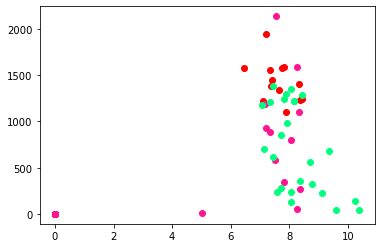

In [113]:
plt.scatter(teams1['bowl_econ'],teams1['balls_bowled'],color='r')
plt.scatter(teams2['bowl_econ'],teams2['balls_bowled'],color='b')
plt.scatter(teams4['bowl_econ'],teams4['balls_bowled'],color='deeppink')
plt.scatter(teams5['bowl_econ'],teams5['balls_bowled'],color='springgreen')
plt.legend

## Understanding the bowlers in terms of their wicket taking ability that is their bowling strike
### Bowling strike means the number of balls a bowler takes to get a wicket which means lower the bowling strike , better the bowler is

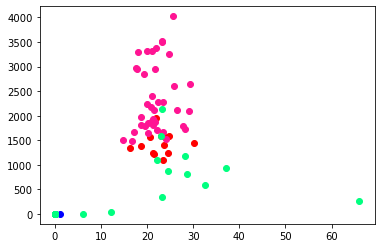

In [75]:
plt.scatter(teams1['bowl_strike_rate'],teams1['balls_bowled'],color='r')
plt.scatter(teams2['bowl_strike_rate'],teams2['balls_bowled'],color='b')
plt.scatter(teams4['bowl_strike_rate'],teams4['balls_bowled'],color='deeppink')
plt.scatter(teams5['bowl_strike_rate'],teams5['balls_bowled'],color='springgreen')

### We can see that teams5 players have the best bowling strike rate as well as best economy rate
#### Economy rate and bowling strike rate are directly proportional that is better the economy rate,better the striker rate.In other words, less runs the bowler gives he is likely to put more pressure on the batsmen to yield a wicket.
#### Number of balls or experience plays a crucial role in bowler's economy and strike rate

### Understanding the batting skills of players

In [76]:
teams1.head(2)

,names,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
2,AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.82,23.03,7.0,0
33,Imran Tahir,59.0,37.0,2.0,8.25,89.19,1340.0,7.64,16.34,13.0,0


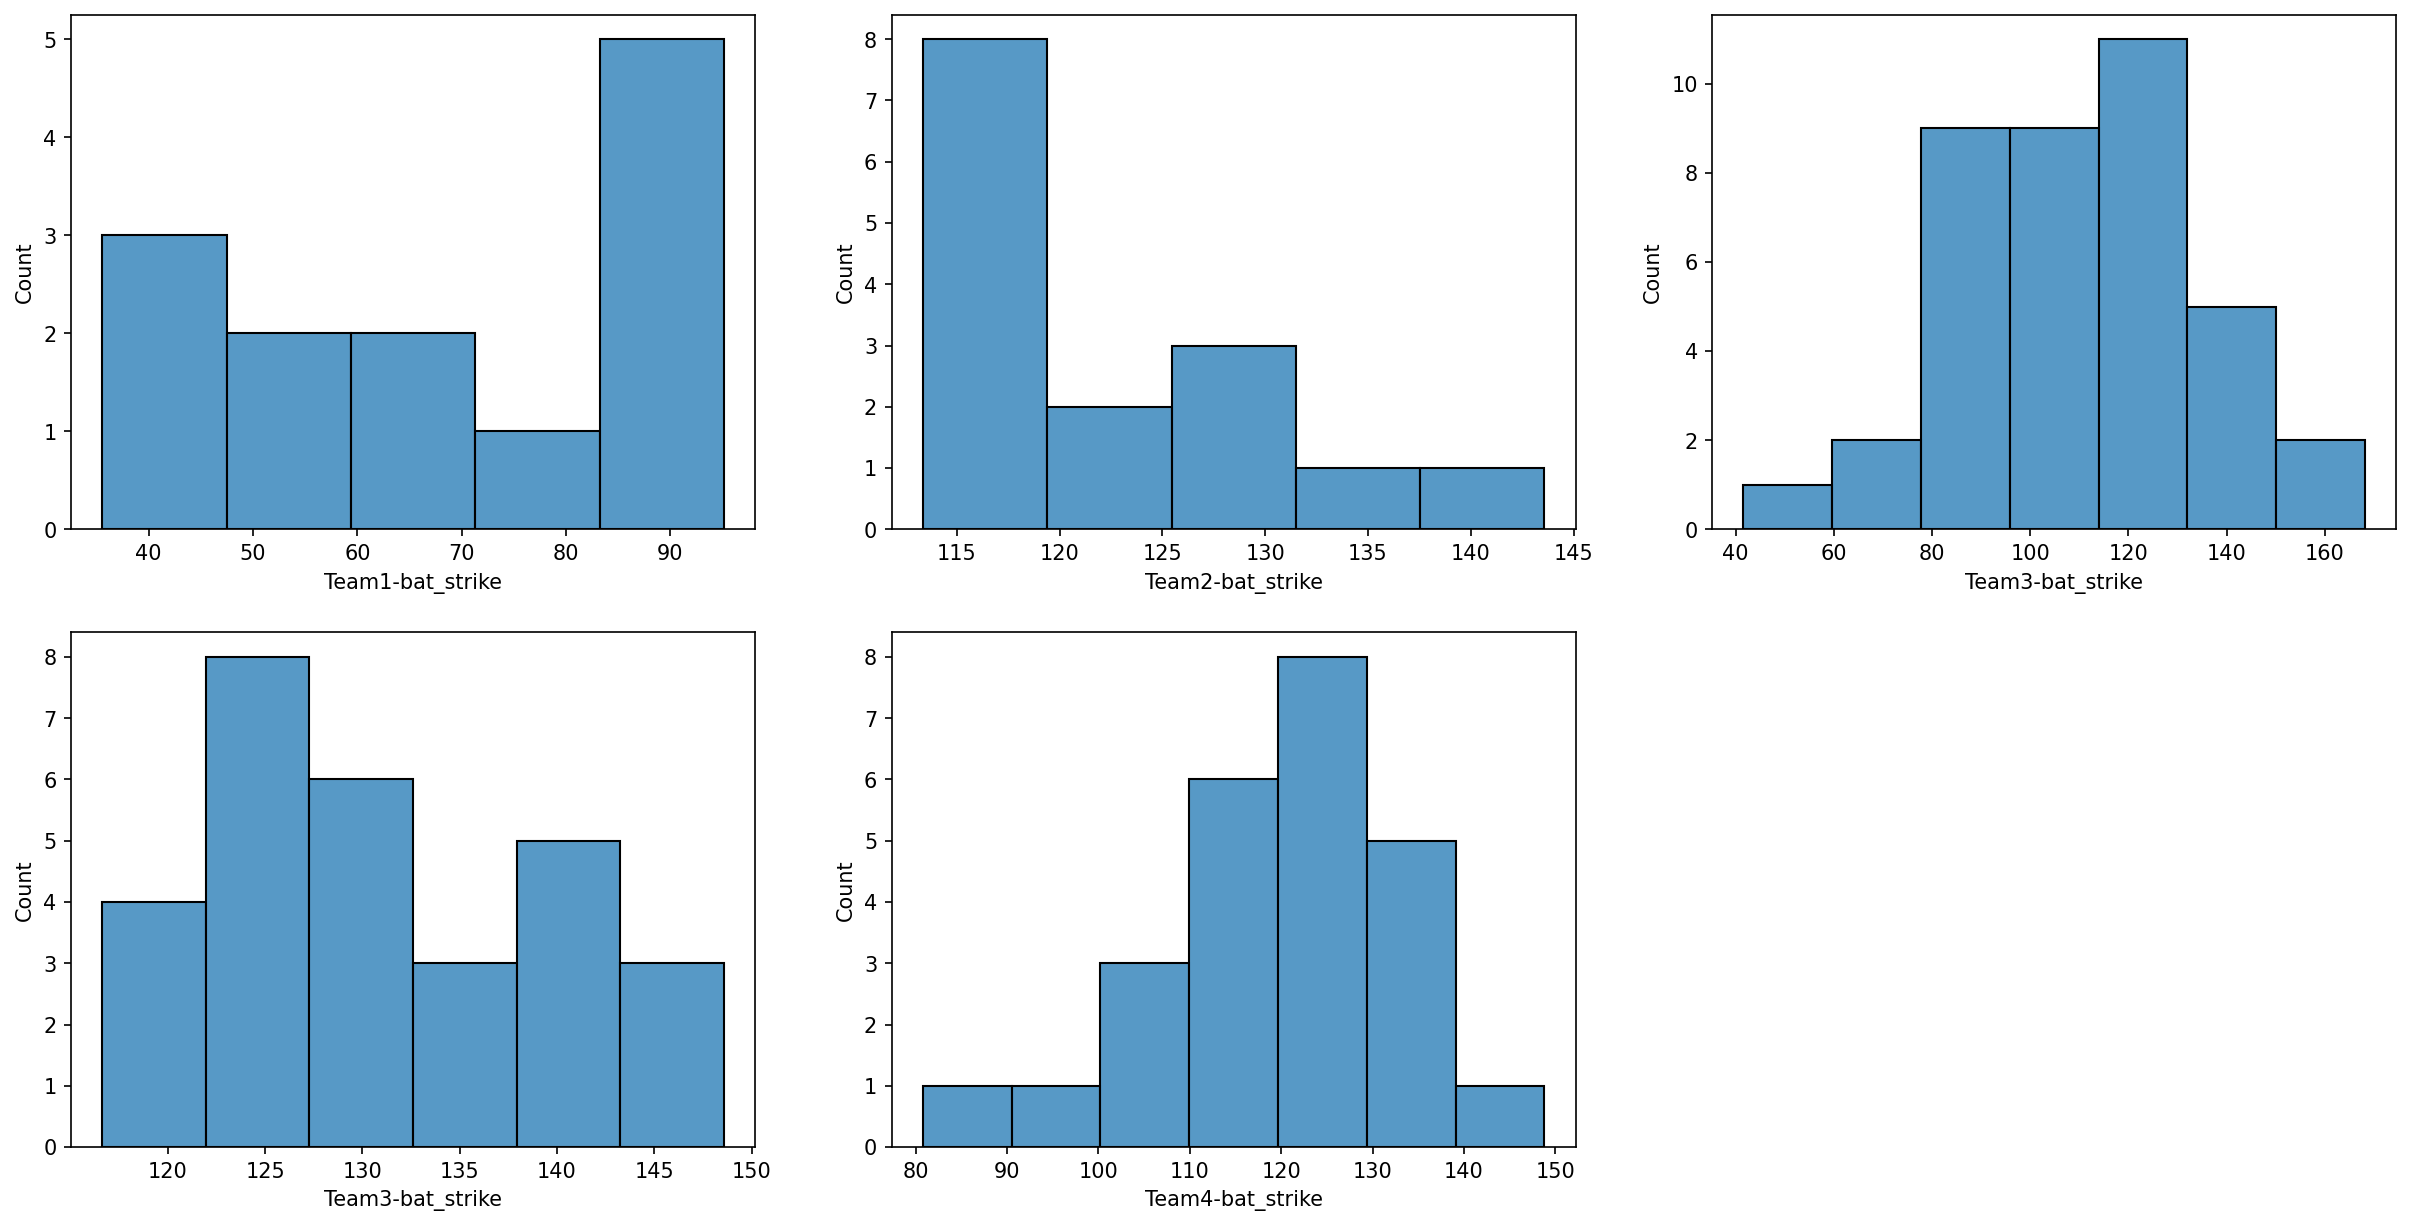

In [116]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,3,1)
sns.histplot(teams1['bat_strike'])
plt.xlabel('Team1-bat_strike')

plt.subplot(2,3,2)
sns.histplot(teams2['bat_strike'])
plt.xlabel('Team2-bat_strike')

plt.subplot(2,3,3)
sns.histplot(teams3['bat_strike'])
plt.xlabel('Team3-bat_strike')

plt.subplot(2,3,4)
sns.histplot(teams4['bat_strike'])
plt.xlabel('Team3-bat_strike')

plt.subplot(2,3,5)
sns.histplot(teams5['bat_strike'])
plt.xlabel('Team4-bat_strike')

plt.show()

### From the low batting strike of team1 we can see that team1 is pure bowler

### From the graphs we can see that all the players of the cluster have batting skill

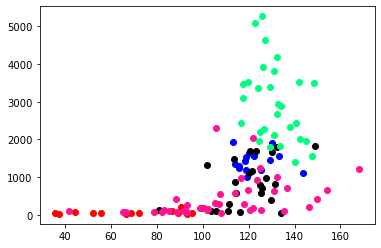

In [80]:
plt.scatter(teams1['bat_strike'],teams1['balls_faced'],color='r')
plt.scatter(teams2['bat_strike'],teams2['balls_faced'],color='b')
plt.scatter(teams3['bat_strike'],teams3['balls_faced'],color='black')
plt.scatter(teams4['bat_strike'],teams4['balls_faced'],color='deeppink')
plt.scatter(teams5['bat_strike'],teams5['balls_faced'],color='springgreen')

### From the scatter plot we can see that teams4 players are the best in terms of strike rate with strike ranging from close to 120 to around 145. And they have faced most balls among all other cluster's players
### Few players from teams2 have strike of 140+
### Players of teams1 have strike similar to teams4 but haven't faced as much balls as teams4 players

In [81]:
teams1.head(2)

,names,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
2,AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.82,23.03,7.0,0
33,Imran Tahir,59.0,37.0,2.0,8.25,89.19,1340.0,7.64,16.34,13.0,0


### Batting average tells us how likely the players is to score runs in a match. Say a player's average is 30.We can say that ,that player is likely to score a minimum score of 30 in the next match.
### Batting average says how reliable a player is


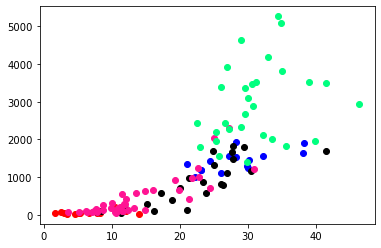

In [82]:
plt.scatter(teams1['bat_average'],teams1['balls_faced'],color='r')
plt.scatter(teams2['bat_average'],teams2['balls_faced'],color='b')
plt.scatter(teams3['bat_average'],teams3['balls_faced'],color='black')
plt.scatter(teams4['bat_average'],teams4['balls_faced'],color='deeppink')
plt.scatter(teams5['bat_average'],teams5['balls_faced'],color='springgreen')

### We can say teams4 and teams2 players are reliable in maintaining a partnership with good run rate and without losing their wicket
### We can see a relationship between batting average and batting strike rate. They are inversely proportion.
### Higher strike rate means the batsman is likely to go for big hits thereby at risk of losing their wicket hence they won't be scoring lot of runs which leads to lower batting average. As strike rate increases ,batting average decreases.
### Players with strike around 125 . Have good average as they are less likely to go for big hits compared to players with higher strike rate
## Important conclusion we can come to from both the graphs is that experience doesn't always impact the batting stats positively.
## Infact as experience increases the batting stats decreases that is,young inexperienced players have good strike rate and average
## This could be due to the fact that young players are ready to take risk more.